In [1]:
# !pip install --upgrade accelerate
# !pip install --upgrade transformers

In [3]:
import transformers
import accelerate
print(f"Transformers version: {transformers.__version__}")
print(f"Accelerate version: {accelerate.__version__}")

Transformers version: 4.45.2
Accelerate version: 1.0.1


## Loading the Dataset

you can find the dataset info [here](https://huggingface.co/datasets/csebuetnlp/xlsum)

In [4]:
# Install the Datasets library
!pip install datasets

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 471.6/471.6 kB 17.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 9.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 134.8/134.8 kB 11.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.1/194.1 kB 15.7 MB/s eta 0:00:00


In [5]:
from datasets import load_dataset

dataset = load_dataset("csebuetnlp/xlsum", "arabic")

dataset

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


0000.parquet:   0%|          | 0.00/95.1M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/10.6M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/10.6M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/37519 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/4689 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/4689 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'url', 'title', 'summary', 'text'],
        num_rows: 37519
    })
    test: Dataset({
        features: ['id', 'url', 'title', 'summary', 'text'],
        num_rows: 4689
    })
    validation: Dataset({
        features: ['id', 'url', 'title', 'summary', 'text'],
        num_rows: 4689
    })
})

In [6]:
dataset = dataset.remove_columns(['id', 'url', 'title'])

In [7]:
dataset

DatasetDict({
    train: Dataset({
        features: ['summary', 'text'],
        num_rows: 37519
    })
    test: Dataset({
        features: ['summary', 'text'],
        num_rows: 4689
    })
    validation: Dataset({
        features: ['summary', 'text'],
        num_rows: 4689
    })
})

In [8]:
dataset["train"][0]

{'summary': 'ÿ®ÿØÿ£ÿ™ ÿßŸÑŸÇŸàÿßÿ™ ÿßŸÑÿ£ŸàŸÉÿ±ÿßŸÜŸäÿ© ÿßŸÑÿßŸÜÿ≥ÿ≠ÿßÿ® ŸÖŸÜ ÿ¥ÿ®Ÿá ÿ¨ÿ≤Ÿäÿ±ÿ© ÿßŸÑŸÇÿ±ŸÖ.',
 'text': 'ŸàŸÉÿßŸÜ ÿßŸÑÿ±ÿ¶Ÿäÿ≥ ÿßŸÑÿ£ŸàŸÉÿ±ÿßŸÜŸä ÿßŸÑŸÖÿ§ŸÇÿ™ÿå ÿßŸÑŸÉÿ≥ŸÜÿØÿ± ÿ™Ÿàÿ±ÿ™ÿ¥ŸäŸÜŸàŸÅÿå ŸÇÿØ ÿ£ŸÖÿ± ÿ®ÿ≥ÿ≠ÿ® ÿ¨ŸÖŸäÿπ ÿßŸÑŸÇŸàÿßÿ™ ÿßŸÑÿ£ŸàŸÉÿ±ÿßŸÜŸäÿ© ŸÖŸÜ ÿßŸÑŸÇÿ±ŸÖ. Ÿàÿ≥Ÿäÿ∑ÿ±ÿ™ ŸÇŸàÿßÿ™ ÿ±Ÿàÿ≥Ÿäÿ© ÿµÿ®ÿßÿ≠ ÿßŸÑÿßÿ´ŸÜŸäŸÜ ÿπŸÑŸâ ŸÇÿßÿπÿØÿ© ÿ®ÿ≠ÿ±Ÿäÿ© ÿ£ŸàŸÉÿ±ÿßŸÜŸäÿ© ŸÅŸä ŸÅŸäŸàÿØŸàÿ≥Ÿäÿßÿå ŸÅŸä ÿ´ÿßŸÑÿ´ Ÿáÿ¨ŸàŸÖ ŸÖŸÜ ŸÜŸàÿπŸá ÿÆŸÑÿßŸÑ 48 ÿ≥ÿßÿπÿ©ÿå Ÿàÿ∞ŸÑŸÉ ÿ®ÿ≠ÿ≥ÿ® ÿ™ÿµÿ±Ÿäÿ≠ÿßÿ™ ŸÖÿ≥ÿ§ŸàŸÑŸäŸÜ ÿ£ŸàŸÉÿ±ÿßŸÜŸäŸäŸÜ ŸÑÿ®Ÿä ÿ®Ÿä ÿ≥Ÿä . ŸàŸÇÿßŸÑ ÿßŸÑŸÖÿ™ÿ≠ÿØÿ´ ÿ®ÿßÿ≥ŸÖ Ÿàÿ≤ÿßÿ±ÿ© ÿßŸÑÿØŸÅÿßÿπ ÿßŸÑÿ£ŸàŸÉÿ±ÿßŸÜŸäÿ© ŸÅŸÑÿßÿØŸäÿ≥ŸÑÿßŸÅ ÿ≥ŸäŸÑŸäÿ≤ŸÜŸäŸàŸÅ ÿ•ŸÜ ÿßŸÑŸÇŸàÿßÿ™ ÿßŸÑÿ±Ÿàÿ≥Ÿäÿ© Ÿáÿßÿ¨ŸÖÿ™ ÿßŸÑŸÇÿßÿπÿØÿ© Ÿàÿ£ŸÑŸÇÿ™ ÿßŸÑŸÇÿ®ÿ∂ ÿπŸÑŸâ ÿßŸÑÿ¨ŸÜŸàÿØ ÿßŸÑÿ£ŸàŸÉÿ±ÿßŸÜŸäŸäŸÜ ŸÅŸä ŸÇÿßÿπÿØÿ© ŸÅŸäŸàÿØŸàÿ≥Ÿäÿß ŸàŸÇŸäÿØÿ™ ÿ£ŸäÿßÿØŸä ÿ∂ÿ®ÿßÿ∑ŸáŸÖ. ŸàŸÖŸÜ ÿßŸÑŸÖÿ™ŸàŸÇÿπ ÿ£ŸÜ ÿ™ÿ≥Ÿäÿ∑ÿ± ÿßŸÑÿ£ÿ≤ŸÖÿ© ÿßŸÑÿ£ŸàŸÉÿ±ÿßŸÜŸäÿ© ÿπŸÑŸâ ŸÇŸÖÿ© ŸÖÿ¨ŸÖŸàÿπÿ© ÿßŸÑÿØŸàŸÑ ÿßŸÑÿµŸÜÿßÿπŸäÿ

In [9]:
def show_samples(dataset, num_samples=3, seed=42):
    sample = dataset["train"].shuffle(seed=seed).select(range(num_samples))
    for example in sample:
        print(f"\n'>> Summary: {example['summary']}'")
        print(f"'>> Text: {example['text']}'")

In [10]:
show_samples(dataset)


'>> Summary: ÿ¥ŸáÿØÿ™ ŸÖÿØŸäŸÜÿ© ÿßŸÑŸÇÿØÿ≥ ŸÖŸÜÿßŸàÿ¥ÿßÿ™ ŸÖÿ™ŸÅÿ±ŸÇÿ© ÿ®ŸäŸÜ ÿßŸÑÿ¨Ÿäÿ¥ ÿßŸÑÿ•ÿ≥ÿ±ÿßÿ¶ŸäŸÑŸä Ÿàÿ¥ÿ®ÿßŸÜ ŸÅŸÑÿ≥ÿ∑ŸäŸÜŸäŸäŸÜ ŸÅŸä ŸÖŸÜÿßÿ∑ŸÇ ÿ®ÿßÿ® ÿßŸÑÿπÿßŸÖŸàÿØ Ÿàÿ≥ŸÑŸàÿßŸÜ Ÿàÿ±ÿ£ÿ≥ ÿßŸÑÿπÿßŸÖŸàÿØ ŸÅŸä ÿßŸÑŸÇÿØÿ≥ ÿßŸÑÿ¥ÿ±ŸÇŸäÿ©.'
'>> Text: ŸÜÿ¥ÿ±ÿ™ ÿßŸÑÿ¥ÿ±ÿ∑ÿ© ÿßŸÑÿ•ÿ≥ÿ±ÿßÿ¶ŸäŸÑŸäÿ© ÿ£ŸÉÿ´ÿ± ŸÖŸÜ ÿÆŸÖÿ≥ÿ© ÿ¢ŸÑÿßŸÅ ŸÖŸÜ ÿ≠ÿ±ÿ≥ ÿßŸÑÿ≠ÿØŸàÿØ ŸÅŸä ÿ£ÿ≠Ÿäÿßÿ° ÿßŸÑŸÇÿØÿ≥ ÿßŸÑÿ¥ÿ±ŸÇŸäÿ©. Ÿàÿ™ŸÇŸàŸÑ ŸÖÿ±ÿßÿ≥ŸÑÿ© ÿ®Ÿä ÿ®Ÿä ÿ≥Ÿä ŸÅŸä ÿßŸÑŸÇÿØÿ≥ÿåŸÜŸàÿßŸÑ ÿ£ÿ≥ÿπÿØÿå ÿ•ŸÜ ÿ¥ÿßÿ®ÿß ŸÅŸÑÿ≥ÿ∑ŸäŸÜŸäÿß ŸÅŸä ŸÖŸÜÿ∑ŸÇÿ© ÿßŸÑÿ∑Ÿàÿ± ÿ£ÿµŸäÿ® ÿ®ÿ±ÿµÿßÿµÿ© ŸÖÿ∑ÿßÿ∑Ÿäÿ© ŸÅŸä ÿßŸÑÿ±ÿ£ÿ≥ ŸÜŸÇŸÑ ÿπŸÑŸâ ÿßÿ´ÿ±Ÿáÿß ŸÑŸÑŸÖÿ≥ÿ™ÿ¥ŸÅŸâ. ŸÉŸÖÿß ÿßŸÜÿØŸÑÿπÿ™ ŸÖŸàÿßÿ¨Ÿáÿßÿ™ ÿπŸÜÿØ ÿ≠ÿßÿ¨ÿ≤ ŸÇŸÑŸÜÿØŸäÿß ÿßŸÑÿπÿ≥ŸÉÿ±Ÿä ŸÅŸä ŸÖÿ∏ÿßŸáÿ±ÿ© ŸÇÿßŸÖÿ™ ÿßŸÑÿ¥ÿ±ÿ∑ÿ© ÿ®ÿ™ŸÅÿ±ŸäŸÇŸáÿß ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ÿßŸÑÿ∫ÿßÿ≤ ÿßŸÑŸÖÿ≥ŸäŸÑ ŸÑŸÑÿØŸÖŸàÿπ ŸàÿßŸÑÿ±ÿµÿßÿµ ÿßŸÑŸÖÿ∑ÿßÿ∑Ÿä. Ÿàÿ£ÿ∂ÿßŸÅÿ™ ŸÖÿ±ÿßÿ≥ŸÑÿ™ŸÜÿß ÿ£ŸÜ ŸÖÿ™ÿ∏ÿßŸáÿ±ÿß ÿ£ŸÑŸÇŸâ ŸÇŸÜÿ®ŸÑÿ© ÿ≠ÿßÿ±ŸÇÿ© ÿπŸÑŸâ ÿßŸÑÿ¥ÿ±ÿ∑ÿ© ÿßŸÑÿ•ÿ≥ÿ±ÿßÿ¶ŸäŸÑŸäÿ© ŸÅŸä ŸÖŸÜÿ∑ŸÇÿ© ÿ®ÿßÿ®

### Text & Summary length distributions

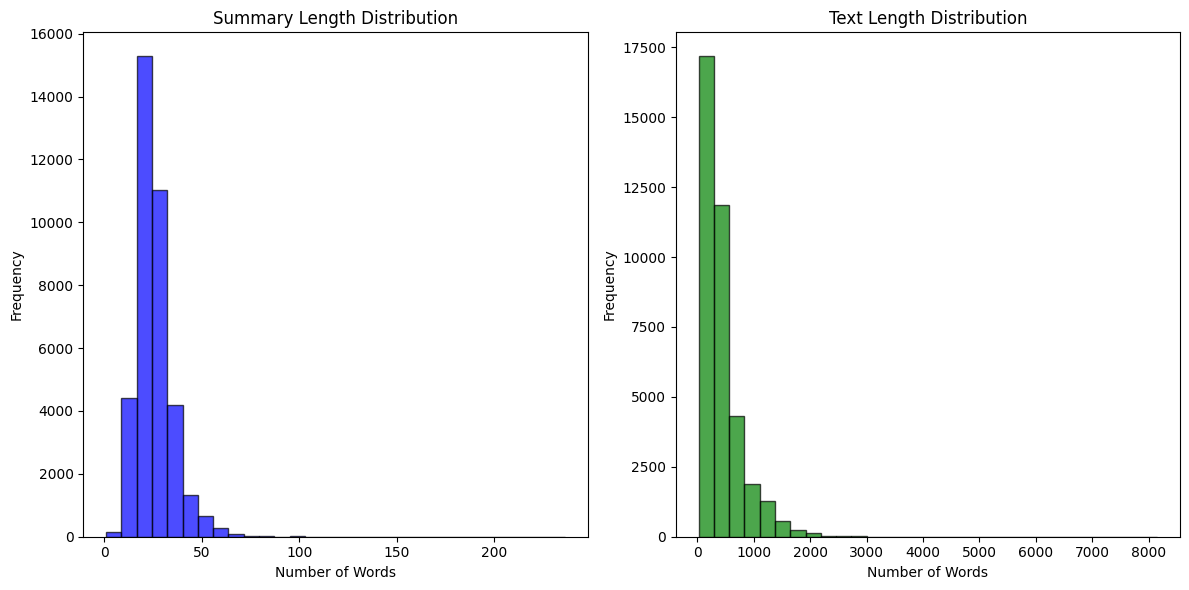

In [11]:
import matplotlib.pyplot as plt

# Function to calculate word count for a given text
def word_count(text):
    return len(text.split())

# Extracting word lengths for 'summary' and 'text' in the train set
train_data = dataset['train']
train_summary_lengths = [word_count(summary) for summary in train_data['summary']]
train_text_lengths = [word_count(text) for text in train_data['text']]

# Plotting histograms
plt.figure(figsize=(12, 6))

# Histogram for 'summary' lengths
plt.subplot(1, 2, 1)
plt.hist(train_summary_lengths, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Summary Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# Histogram for 'text' lengths
plt.subplot(1, 2, 2)
plt.hist(train_text_lengths, bins=30, alpha=0.7, color='green', edgecolor='black')
plt.title('Text Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()


## Tokenization

you can find the model [here](https://huggingface.co/UBC-NLP/AraT5v2-base-1024) and for more info check this [repo](https://github.com/UBC-NLP/araT5)

In [12]:
from transformers import AutoTokenizer

# model_checkpoint = "google/mt5-small"
model_checkpoint = "UBC-NLP/AraT5v2-base-1024"

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

tokenizer_config.json:   0%|          | 0.00/2.37k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/2.35M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/8.40M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Let‚Äôs test out the AraT5 tokenizer on a small example:

In [13]:
inputs = tokenizer("ÿßŸÜÿß ÿßÿ≠ÿ® ÿßŸÜ ÿßÿ¥ÿßŸáÿØ ŸÉÿ±ÿ© ÿßŸÑŸÇÿØŸÖ!")
inputs

{'input_ids': [584, 3244, 129, 98670, 5808, 4148, 109650, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}

In [14]:
tokenizer.convert_ids_to_tokens(inputs.input_ids)

['‚ñÅÿßŸÜÿß', '‚ñÅÿßÿ≠ÿ®', '‚ñÅÿßŸÜ', '‚ñÅÿßÿ¥ÿßŸáÿØ', '‚ñÅŸÉÿ±ÿ©', '‚ñÅÿßŸÑŸÇÿØŸÖ', '!', '</s>']

The special Unicode character `‚ñÅ` and end-of-sequence token `</s>` indicate that we‚Äôre dealing with the `SentencePiece` tokenizer

In [15]:
max_input_length = 512
max_target_length = 35


def preprocess_function(examples):
    model_inputs = tokenizer(
        examples["text"],
        max_length=max_input_length,
        truncation=True,
    )
    labels = tokenizer(
        examples["summary"], max_length=max_target_length, truncation=True
    )
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [16]:
tokenized_datasets = dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/37519 [00:00<?, ? examples/s]

Map:   0%|          | 0/4689 [00:00<?, ? examples/s]

Map:   0%|          | 0/4689 [00:00<?, ? examples/s]

## Evaluation Metric

for more info about the metric check [this](https://pypi.org/project/rouge-score/)

In [17]:
# Install the  rouge_score package
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=1688c46d48d1447d85b8a5f7c87391219697bdc4b849a8d074bacb8c3664b069
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [18]:
# import the rouge scorer method
from rouge_score import rouge_scorer

# Initialize RougeScorer with desired metrics
rouge_score = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL', 'rougeLsum'], tokenizer=tokenizer)

In [19]:
generated_summary = "ÿ∞Ÿáÿ® ŸÖÿ≠ŸÖÿØ Ÿà ÿßÿ≠ŸÖÿØ ÿßŸÑŸâ ÿßŸÑŸÜÿßÿØŸä"
reference_summary = "ÿ∞Ÿáÿ® ŸÖÿ≠ŸÖÿØ Ÿà ÿµÿØŸäŸÇŸá ÿßÿ≠ŸÖÿØ ÿßŸÑŸâ ÿßŸÑŸÜÿßÿØŸä ŸÑŸÑÿπÿ® ŸÉÿ±ÿ© ÿßŸÑŸÇÿØŸÖ ŸÅŸä ÿßŸÑÿµÿ®ÿßÿ≠"

In [20]:
ROU = rouge_score.score(reference_summary, generated_summary)
ROU

{'rouge1': Score(precision=1.0, recall=0.5, fmeasure=0.6666666666666666),
 'rouge2': Score(precision=0.8, recall=0.36363636363636365, fmeasure=0.5000000000000001),
 'rougeL': Score(precision=1.0, recall=0.5, fmeasure=0.6666666666666666),
 'rougeLsum': Score(precision=1.0, recall=0.5, fmeasure=0.6666666666666666)}

### Creating a strong baseline

In [21]:
!pip install nltk

In [22]:
import nltk

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
from nltk.tokenize import sent_tokenize


def three_sentence_summary(text):
    return "\n".join(sent_tokenize(text)[:3])


print(three_sentence_summary(dataset["train"][0]["text"]))

ŸàŸÉÿßŸÜ ÿßŸÑÿ±ÿ¶Ÿäÿ≥ ÿßŸÑÿ£ŸàŸÉÿ±ÿßŸÜŸä ÿßŸÑŸÖÿ§ŸÇÿ™ÿå ÿßŸÑŸÉÿ≥ŸÜÿØÿ± ÿ™Ÿàÿ±ÿ™ÿ¥ŸäŸÜŸàŸÅÿå ŸÇÿØ ÿ£ŸÖÿ± ÿ®ÿ≥ÿ≠ÿ® ÿ¨ŸÖŸäÿπ ÿßŸÑŸÇŸàÿßÿ™ ÿßŸÑÿ£ŸàŸÉÿ±ÿßŸÜŸäÿ© ŸÖŸÜ ÿßŸÑŸÇÿ±ŸÖ.
Ÿàÿ≥Ÿäÿ∑ÿ±ÿ™ ŸÇŸàÿßÿ™ ÿ±Ÿàÿ≥Ÿäÿ© ÿµÿ®ÿßÿ≠ ÿßŸÑÿßÿ´ŸÜŸäŸÜ ÿπŸÑŸâ ŸÇÿßÿπÿØÿ© ÿ®ÿ≠ÿ±Ÿäÿ© ÿ£ŸàŸÉÿ±ÿßŸÜŸäÿ© ŸÅŸä ŸÅŸäŸàÿØŸàÿ≥Ÿäÿßÿå ŸÅŸä ÿ´ÿßŸÑÿ´ Ÿáÿ¨ŸàŸÖ ŸÖŸÜ ŸÜŸàÿπŸá ÿÆŸÑÿßŸÑ 48 ÿ≥ÿßÿπÿ©ÿå Ÿàÿ∞ŸÑŸÉ ÿ®ÿ≠ÿ≥ÿ® ÿ™ÿµÿ±Ÿäÿ≠ÿßÿ™ ŸÖÿ≥ÿ§ŸàŸÑŸäŸÜ ÿ£ŸàŸÉÿ±ÿßŸÜŸäŸäŸÜ ŸÑÿ®Ÿä ÿ®Ÿä ÿ≥Ÿä .
ŸàŸÇÿßŸÑ ÿßŸÑŸÖÿ™ÿ≠ÿØÿ´ ÿ®ÿßÿ≥ŸÖ Ÿàÿ≤ÿßÿ±ÿ© ÿßŸÑÿØŸÅÿßÿπ ÿßŸÑÿ£ŸàŸÉÿ±ÿßŸÜŸäÿ© ŸÅŸÑÿßÿØŸäÿ≥ŸÑÿßŸÅ ÿ≥ŸäŸÑŸäÿ≤ŸÜŸäŸàŸÅ ÿ•ŸÜ ÿßŸÑŸÇŸàÿßÿ™ ÿßŸÑÿ±Ÿàÿ≥Ÿäÿ© Ÿáÿßÿ¨ŸÖÿ™ ÿßŸÑŸÇÿßÿπÿØÿ© Ÿàÿ£ŸÑŸÇÿ™ ÿßŸÑŸÇÿ®ÿ∂ ÿπŸÑŸâ ÿßŸÑÿ¨ŸÜŸàÿØ ÿßŸÑÿ£ŸàŸÉÿ±ÿßŸÜŸäŸäŸÜ ŸÅŸä ŸÇÿßÿπÿØÿ© ŸÅŸäŸàÿØŸàÿ≥Ÿäÿß ŸàŸÇŸäÿØÿ™ ÿ£ŸäÿßÿØŸä ÿ∂ÿ®ÿßÿ∑ŸáŸÖ.


In [24]:
# Function to evaluate using rouge_scorer
def evaluate_baseline(dataset, rouge_scorer):
    # Generate summaries for each text in the dataset
    summaries = [three_sentence_summary(text) for text in dataset["text"]]
    # Calculate scores for each prediction-reference pair
    scores = [
        rouge_scorer.score(reference, prediction)
        for reference, prediction in zip(dataset["summary"], summaries)
    ]
    # Average the scores over the dataset
    averaged_scores = {
        "rouge1": sum(score["rouge1"].fmeasure for score in scores) / len(scores),
        "rouge2": sum(score["rouge2"].fmeasure for score in scores) / len(scores),
        "rougeL": sum(score["rougeL"].fmeasure for score in scores) / len(scores),
        "rougeLsum": sum(score["rougeLsum"].fmeasure for score in scores) / len(scores),
    }
    return averaged_scores

In [25]:
# Evaluate the dataset
score = evaluate_baseline(dataset["validation"], rouge_score)

# Format the scores to show percentages rounded to two decimal places
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]
rouge_dict = {rn: round(score[rn] * 100, 2) for rn in rouge_names}
rouge_dict

{'rouge1': 16.12, 'rouge2': 4.2, 'rougeL': 11.71, 'rougeLsum': 13.51}

## Model Defining

In [26]:
from transformers import AutoModelForSeq2SeqLM

model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)

config.json:   0%|          | 0.00/699 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.47G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

**Model Arguments**

In [27]:
from transformers import Seq2SeqTrainingArguments

model_path = '/content/drive/MyDrive/Summarization/model'


args = Seq2SeqTrainingArguments(
    output_dir=model_path + "/finetuned-arat5-xlsum",
    evaluation_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    weight_decay=0.01,
    save_total_limit=1,
    num_train_epochs=1,
    predict_with_generate=True,
    disable_tqdm= False
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


**compute metrics during the training**

In [28]:
import numpy as np

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    # Decode generated summaries into text
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    # Replace -100 in the labels as we can't decode them
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    # Decode reference summaries into text
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    # ROUGE expects a newline after each sentence
    decoded_preds = ["\n".join(sent_tokenize(pred.strip())) for pred in decoded_preds]
    decoded_labels = ["\n".join(sent_tokenize(label.strip())) for label in decoded_labels]

    # Compute ROUGE scores for each prediction and reference pair
    rouge_scores = {'rouge1': [], 'rouge2': [], 'rougeL': [], 'rougeLsum': []}
    for pred, label in zip(decoded_preds, decoded_labels):
        scores = rouge_score.score(label, pred)
        for key in rouge_scores.keys():
            rouge_scores[key].append(scores[key].fmeasure)

    # Calculate the average ROUGE scores across all samples
    avg_rouge_scores = {key: np.mean(values) * 100 for key, values in rouge_scores.items()}

    # Round the results for easier readability
    return {k: round(v, 4) for k, v in avg_rouge_scores.items()}


**define a data collator for our sequence-to-sequence task**

In [29]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [30]:
tokenized_datasets = tokenized_datasets.remove_columns(
    dataset["train"].column_names
)

In [31]:
features = [tokenized_datasets["train"][i] for i in range(2)]
data_collator(features)

{'input_ids': tensor([[ 2163,  1413, 68318,  ...,  5169,   114,     1],
        [22238,   885,   247,  ...,  3397, 11244,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'labels': tensor([[  6049,   4783,  68318,    771,  22974,     36,  10203,  17642,  76147,
         109566,      1,   -100,   -100,   -100,   -100,   -100,   -100,   -100,
           -100,   -100,   -100,   -100,   -100,   -100,   -100,   -100,   -100,
           -100,   -100,   -100,   -100,   -100,   -100,   -100,   -100],
        [   151,    682,   6854,   7771,  31574,  28325,  64801,  41656,  51745,
          20392,    218,    422,    141,    151,  37126,  41426,  14463, 109610,
         109598,  84401,  52644,    605,     83,     83,   7345,  13294,     83,
          11501,     83,    114,   9254,   6839,  53024,    378,      1]]), 'decoder_input_ids': tensor([[     0,   6049,   4783,  68318,    771,  22974,     36,  10203,  17642,
          76147, 109566,      1,

**instantiate the trainer with the standard arguments**

In [32]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    model,
    args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

### Start Training

In [33]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1220: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


TrainOutput(global_step=4690, training_loss=3.310556830627832, metrics={'train_runtime': 6846.5656, 'train_samples_per_second': 5.48, 'train_steps_per_second': 0.685, 'total_flos': 3.2521287299014656e+16, 'train_loss': 3.310556830627832, 'epoch': 1.0})

## Saving the model

In [34]:
trainer.save_model(model_path + "/summarization_model")

## Evaluating the model

In [35]:
trainer.evaluate()

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1220: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


{'eval_loss': 2.4148266315460205,
 'eval_rouge1': 28.0159,
 'eval_rouge2': 12.8537,
 'eval_rougeL': 24.4192,
 'eval_rougeLsum': 24.4612,
 'eval_runtime': 845.4825,
 'eval_samples_per_second': 5.546,
 'eval_steps_per_second': 0.694,
 'epoch': 1.0}

## Loading and using the model

In [37]:
from transformers import pipeline

fine_tuned_model = model_path + "/summarization_model"
summarizer = pipeline("summarization", model=fine_tuned_model)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [38]:
def print_summary(idx):
    text = dataset["test"][idx]["text"]
    summary = dataset["test"][idx]["summary"]
    summary = summarizer(dataset["test"][idx]["text"])[0]["summary_text"]
    print(f"'>>> Text: {text}'")
    print(f"\n'>>> Summary: {summary}'")
    print(f"\n'>>> Generated Summary: {summary}'")

In [39]:
print_summary(100)

'>>> Text: ŸÉÿßŸÜ ÿ®ŸäŸÉŸáÿßŸÖ ÿ∂ŸÖŸÜ ÿßŸÑŸàŸÅÿØ ÿßŸÑÿ±ÿ≥ŸÖŸä ÿßŸÑÿ®ÿ±Ÿäÿ∑ÿßŸÜŸä ÿßŸÑÿ∞Ÿä ŸÜŸÇŸÑ ÿßŸÑÿ¥ÿπŸÑÿ© ÿ•ŸÑŸâ ÿ®ÿ±Ÿäÿ∑ÿßŸÜŸäÿß ŸàŸÉÿßŸÜ ÿ®ŸäŸÉŸáÿßŸÖ Ÿäÿ£ŸÖŸÑ ŸÅŸä ÿ£ŸÜ ŸäŸÉŸàŸÜ ÿ∂ŸÖŸÜ ŸÇÿßÿ¶ŸÖÿ© ÿßŸÑŸÖÿØÿ±ÿ® ÿ≥ÿ™ŸäŸàÿ±ÿßÿ™ ÿ®Ÿäÿ±ÿ≥ ŸÑÿ£ŸàŸÑ ŸÅÿ±ŸäŸÇ ŸÉÿ±ÿ© ŸÇÿØŸÖ ŸäŸÖÿ´ŸÑ ÿ®ÿ±Ÿäÿ∑ÿßŸÜŸäÿß ŸÅŸä ÿßŸÑÿ£ŸàŸÑŸÖÿ®ŸäÿßÿØ ŸÖŸÜÿ∞ ÿØŸàÿ±ÿ© ÿ±ŸàŸÖÿß ÿπÿßŸÖ 1960. ŸàŸäÿ∞ŸÉÿ± ÿ£ŸÜ ÿ®ÿ±Ÿäÿ∑ÿßŸÜŸäÿß ŸÑŸäÿ≥ ŸÑŸáÿß ŸÖŸÜÿ™ÿÆÿ® Ÿàÿßÿ≠ÿØ ŸÅŸä ŸÉÿ±ÿ© ÿßŸÑŸÇÿØŸÖÿå ÿ≠Ÿäÿ´ ÿ™Ÿàÿ¨ÿØ ŸÖŸÜÿ™ÿÆÿ®ÿßÿ™ ŸÖŸÜŸÅÿµŸÑÿ© ŸÑÿßŸÜÿ¨ŸÑÿ™ÿ±ÿß ŸàŸàŸäŸÑÿ≤ Ÿàÿßÿ≥ŸÉÿ™ŸÑŸÜÿØÿß ŸàÿßŸäÿ±ŸÑŸÜÿØÿß ÿßŸÑÿ¥ŸÖÿßŸÑŸäÿ©. Ÿàÿ£ÿπÿ±ÿ® ÿ®ŸäŸÉŸáÿßŸÖ( 37 ÿπÿßŸÖÿß) ÿπŸÜ ÿÆŸäÿ®ÿ© ÿ£ŸÖŸÑÿ© ÿ™ÿ¨ÿßŸá ÿßŸÑŸÇÿ±ÿßÿ± ŸÖÿ∂ŸäŸÅÿß ÿ£ŸÜŸá ŸÑŸÜ ŸäŸÉŸàŸÜ ŸáŸÜÿßŸÉ ÿ£ÿ≠ÿØ ÿ£ŸÉÿ´ÿ± ŸÖŸÜŸá ÿ™ÿ¥ÿ¨Ÿäÿπÿß ŸÑŸÑŸÅÿ±ŸäŸÇ. Ÿàÿ£ÿ∂ÿßŸÅ ÿ£ŸÜŸá ŸÉÿßŸÜ ÿ≥ŸäŸÉŸàŸÜ ŸÅÿÆŸàÿ±ÿß ÿ®ÿßŸÑÿßŸÜÿ∂ŸÖÿßŸÖ ÿ•ŸÑŸâ ÿßŸÑŸÅÿ±ŸäŸÇ ÿßŸÑÿ®ÿ±Ÿäÿ∑ÿßŸÜŸä ŸàŸäÿ™ŸÖŸÜŸâ ŸÖÿ´ŸÑ ÿßŸÑÿ¨ŸÖŸäÿπ ÿ£ŸÜ ŸäŸÅŸàÿ≤ ÿßŸÑŸÅÿ±ŸäŸÇ ÿ®ÿßŸÑŸÖŸäÿØÿßŸÑŸäÿ© ÿßŸÑÿ∞Ÿáÿ®Ÿäÿ© ŸÖŸàÿßÿ∂Ÿäÿπ ŸÇÿØ ÿ™ŸáŸÖŸÉ ŸÜŸáÿßŸäÿ© ŸàŸÉÿßŸÜ

In [40]:
print_summary(0)

'>>> Text: ŸÜÿ∂ÿßŸÑ ÿ≠ÿ≥ŸÜ Ÿàÿßÿπÿ™ÿ±ŸÅ ŸÜÿ∂ÿßŸÑ ÿ≠ÿ≥ŸÜÿå ÿßŸÑÿ∞Ÿä ŸäÿØÿßŸÅÿπ ÿπŸÜ ŸÜŸÅÿ≥Ÿáÿå ÿ®ŸÇÿ™ŸÑ ÿßŸÑÿ¨ŸÜŸàÿØÿå ŸÖÿ™ÿ≠ÿ¨ÿ¨ÿß ÿ®ÿ≠ŸÖÿßŸäÿ© ÿßŸÑŸÖÿ≥ŸÑŸÖŸäŸÜ ŸàÿπŸÜÿßÿµÿ± ÿ∑ÿßŸÑÿ®ÿßŸÜ ŸÅŸä ÿ£ŸÅÿ∫ÿßŸÜÿ≥ÿ™ÿßŸÜÿå ŸàŸÑŸÉŸÜ ÿßŸÑŸÇÿßÿ∂Ÿä ÿßŸÑÿπÿ≥ŸÉÿ±Ÿä ÿ±ŸÅÿ∂ ÿ≠ÿ¨ÿ™Ÿá "ÿ®ÿ≠ŸÖÿßŸäÿ© ÿßŸÑÿ¢ÿÆÿ±ŸäŸÜ". Ÿàÿ•ÿ∞ÿß ÿ£ÿØŸäŸÜ ÿ≠ÿ≥ŸÜÿå ÿßŸÑÿ®ÿßŸÑÿ∫ ŸÖŸÜ ÿßŸÑÿπŸÖÿ± 42 ÿπÿßŸÖÿßÿå ÿ®ŸÇÿ™ŸÑ 13 ÿ¥ÿÆÿµÿß Ÿàÿ¨ÿ±ÿ≠ ÿ¢ÿÆÿ±ŸäŸÜ ŸÅÿ•ŸÜŸá ÿ≥ŸäŸàÿßÿ¨Ÿá ÿπŸÇŸàÿ®ÿ© ÿßŸÑÿ•ÿπÿØÿßŸÖ. ŸàŸäÿπÿ™ÿ®ÿ± ÿßŸÑÿ≠ÿßÿØÿ´ ÿßŸÑÿ£ŸÉÿ´ÿ± ÿØŸÖŸàŸäÿ© ŸÖŸÜ ÿ®ŸäŸÜ ÿßŸÑŸáÿ¨ŸÖÿßÿ™ ÿ∫Ÿäÿ± ÿßŸÑŸÇÿ™ÿßŸÑŸäÿ© ÿßŸÑÿ™Ÿä ŸàŸÇÿπÿ™ ŸÅŸä ŸÇÿßÿπÿØÿ© ÿπÿ≥ŸÉÿ±Ÿäÿ© ÿ£ŸÖÿ±ŸäŸÉŸäÿ©. ŸàŸÇÿßŸÑ ÿ¥ŸáŸàÿØ ÿπŸäÿßŸÜ ÿØÿÆŸÑ ŸÅŸä 5 ŸÜŸàŸÅŸÖÿ®ÿ±/ÿ™ÿ¥ÿ±ŸäŸÜ ÿßŸÑÿ´ÿßŸÜŸä ÿπÿßŸÖ 2009 ŸÖÿµÿ≠ÿ© ÿ™ÿπÿ¨ ÿ®ÿßŸÑÿ¨ŸÜŸàÿØ ÿßŸÑÿ∞ŸäŸÜ ŸÉÿßŸÜŸàÿß ŸäŸÜÿ™ÿ∏ÿ±ŸàŸÜ ÿ£ÿØŸàÿßÿ±ŸáŸÖ ÿ•ÿ¨ÿ±ÿßÿ° ŸÅÿ≠Ÿàÿµÿßÿ™ ÿ∑ÿ®Ÿäÿ© ÿ£Ÿà ÿßŸÑÿ™ŸÑŸÇŸäÿ≠ÿå ÿ´ŸÖ ÿµÿπÿØ ÿπŸÑŸâ ŸÖŸÉÿ™ÿ®ÿå Ÿàÿ£ÿ∑ŸÑŸÇ ÿßŸÑŸÜÿßÿ± ŸÖŸÜ ÿ≥ŸÑÿßÿ≠ŸäŸÜ ÿ®ŸäÿØŸäŸáÿå ÿØŸàŸÜ ÿ™ŸàŸÇŸÅ ÿ•ŸÑÿß ŸÑÿ•ÿπÿßÿØÿ© ÿ™ÿπÿ®ÿ¶ÿ© ÿßŸÑÿ≥ŸÑÿßÿ≠. ŸÖŸàÿßÿ